In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create 5-d array of data
array = 5*np.ones(32).reshape((2, 2, 2, 2, 2))

# Create tensor
tensor_1_1 = Tensor(array)

# Result preview
print(tensor_1_1)
print(tensor_1_1.data)

This tensor is of order 5 and consists of 32 elements.
Sizes and names of its modes are (2, 2, 2, 2, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.
[[[[[5. 5.]
    [5. 5.]]

   [[5. 5.]
    [5. 5.]]]


  [[[5. 5.]
    [5. 5.]]

   [[5. 5.]
    [5. 5.]]]]



 [[[[5. 5.]
    [5. 5.]]

   [[5. 5.]
    [5. 5.]]]


  [[[5. 5.]
    [5. 5.]]

   [[5. 5.]
    [5. 5.]]]]]


In [5]:
# Calculate Frobenious norm
F_N = tensor_1_1.frob_norm
print('Frobenious norm =', F_N)

Frobenious norm = 28.284271247461902


### Solution: Part 2

In [6]:
# Create tensors and collect information

# Setting Parameters
tensor_1_2 = []
tensor_size_1_2 = []
dim_size = [2]  # size of each dimension
M_1_2 = range(3,21)  # order

# Create tensors and collect information
for i in M_1_2:
    array = np.ones(dim_size * i)  # Create the array of data
    t = Tensor(array)  # Create tensor
    tensor_1_2.append(t)
    tensor_size_1_2.append(t.size)

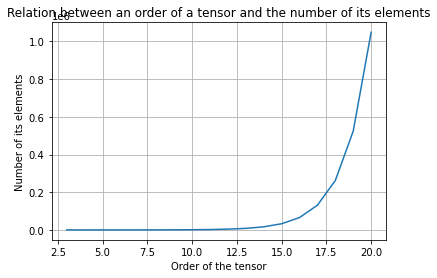

In [7]:
# Plot results
plt.plot(M_1_2,tensor_size_1_2)
plt.grid(True)
plt.title('Relation between an order of a tensor and the number of its elements')
plt.xlabel('Order of the tensor')
plt.ylabel('Number of its elements')
plt.show()

### Solution: Part 3

In [8]:
# Create tensors and collect information

# Setting Parameters
tensor_1_3 = []
tensor_size_1_3 = []
dim_size_1_3 = range(3,16)  # size of each dimension
M = 3  # order

# Create tensors and collect information
for i in dim_size_1_3:
    array = np.ones(M * [i])  # Create the array of data
    t = Tensor(array)  # Create tensor
    tensor_1_3.append(t)
    tensor_size_1_3.append(t.size)

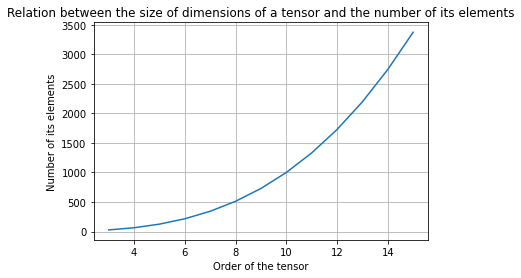

In [9]:
# Plot results
plt.plot(dim_size_1_3,tensor_size_1_3)
plt.grid(True)
plt.title('Relation between the size of dimensions of a tensor and the number of its elements')
plt.xlabel('Order of the tensor')
plt.ylabel('Number of its elements')
plt.show()

### Solution: Part 4

In part 2, the relation between the order M of a tensor and the number of its elements N is found. With fixed size of each dimension equal to 2, the order of the tensor varies from 3 to 20. The relationship can be written as
$$N=2^{M}$$
where 2 is derived from the fixed size of each dimension.

In part 3, the relation between the size of dimensions D of a tensor and the number of its elements N is found. With fixed order of the tensor equal to 3, the size of each dimension varies from 3 to 15. The relationship can be written as
$$N=D^{3}$$
where 3 is derived from the fixed order of the tensor.

In conclusion, the number of elements in a tensor with equal size of each dimension is
$$N=D^{M}$$
From this equation, it is found that with equal size of each dimension, the number of elements in a tensor increases exponentially with order, and increases with dimension to the power of order. Therefore, in most cases, increase the order bring more elements into a tensor than increase the dimension. While in both cases, the computation complexity is increased dramatically. 

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

###########################################################################################################
# Personal Understanding
###########################################################################################################

According to the given examples, and the matrix properties in Python:

For a tensor with shape (a,b,c), since the Frontal slice is expressed as 'tensor.data[k, :, :]', and the Mode-2 fiber is expressed as 'tensor.data[k, i, :]', the index mode order in the tensor in Phthon is different from that in theory. Theoretically, the mode should be ['mode-1', 'mode-2', 'mode-3'] correspoinding to [x, y, z] axis. However, the axis changes to [z, x, y] in the matrix in Python. Therefore, the mode should be ['mode-3', 'mode-1', 'mode-2'] considering the matrix property in Python. And ['mode-3', 'mode-1', 'mode-2'] refers to ['mode-0', 'mode-1', 'mode-2'] given by the function "Tensor".

If the shape of tensor is (a,b,c,d), the axis is actually [t, z, x, y]. Therefore, the mode should be ['mode-4', 'mode-3', 'mode-1', 'mode-2'], refering to ['mode-0', 'mode-1', 'mode-2', 'mode-3'] given by the function "Tensor".

In [12]:
# Create a tensor of order 4
array = np.arange(81).reshape((3, 3, 3, 3))

# Create tensor
tensor_2_1 = Tensor(array)

In [13]:
# Display horizontal slices
for i in range(0,3):
    for j in range(0,3):
        print(tensor_2_1.data[i,:,j,:])

[[ 0  1  2]
 [ 9 10 11]
 [18 19 20]]
[[ 3  4  5]
 [12 13 14]
 [21 22 23]]
[[ 6  7  8]
 [15 16 17]
 [24 25 26]]
[[27 28 29]
 [36 37 38]
 [45 46 47]]
[[30 31 32]
 [39 40 41]
 [48 49 50]]
[[33 34 35]
 [42 43 44]
 [51 52 53]]
[[54 55 56]
 [63 64 65]
 [72 73 74]]
[[57 58 59]
 [66 67 68]
 [75 76 77]]
[[60 61 62]
 [69 70 71]
 [78 79 80]]


In [14]:
# Display row fibers
print(tensor_2_1.data[0,0,0,:])
print(tensor_2_1.data[0,0,1,:])
print(tensor_2_1.data[0,0,2,:])
print(tensor_2_1.data[0,1,0,:])
print(tensor_2_1.data[0,1,1,:])

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]
[12 13 14]


### Solution: Part 2

In [15]:
# Create a tensor of order 3
array = np.arange(40).reshape((4, 2, 5))

# Create tensor
tensor_2_2 = Tensor(array)
for i in range(3):
    tensor_2_2.data[i+1,:,:] = 2 * tensor_2_2.data[i,:,:]
print(tensor_2_2.data)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[ 0  2  4  6  8]
  [10 12 14 16 18]]

 [[ 0  4  8 12 16]
  [20 24 28 32 36]]

 [[ 0  8 16 24 32]
  [40 48 56 64 72]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)
print(tensor)
print(tensor.data)

# Unfolding of a tensor
tensor.unfold(mode=2)

# Result preview
print(tensor)
print(tensor.data)

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (4, 6) and ['mode-2', 'mode-0_mode-1'] respectively.
[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]


## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor

# I1 * I3 * I4 = 72, I2 = 5,  (I4, I3, I1, I2)
array = np.arange(360).reshape((2, 4, 9, 5))

# Create tensor
tensor_3_1 = Tensor(array)

In [18]:
# Display unfolded version

# since the mode 2 unfolding aims at y, the second mode in ['mode-1', 'mode-2', 'mode-3', 'mode-4']
# in python, the axis of a matrix is (t, z, x, y)
# hence the mode 2 unfolding changes to ['mode-4', 'mode-3', 'mode-1', 'mode-2']
# the modes of tenser given here is ['mode-0', 'mode-1', 'mode-2', 'mode-3']
# Hence mode 2 unfolding is 'mode-3' here

print(tensor_3_1.unfold(mode=3).data)
print(np.shape(tensor_3_1))

[[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
   90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
  180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
  270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355]
 [  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
   91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
  181 186 191 196 201 206 211 216 221 226 231 236 241 246 251 256 261 266
  271 276 281 286 291 296 301 306 311 316 321 326 331 336 341 346 351 356]
 [  2   7  12  17  22  27  32  37  42  47  52  57  62  67  72  77  82  87
   92  97 102 107 112 117 122 127 132 137 142 147 152 157 162 167 172 177
  182 187 192 197 202 207 212 217 222 227 232 237 242 247 252 257 262 267
  272 277 282 287 292 297 302 307 312 317 322 327 332 337 342 347 352 357]
 [  3   8  13  18  23  28  33  38  43  48  53  58  63  68  73  78  83  88
   93  98 103 108 113 118 123 128 1

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 
I, J, K = 3, 4, 2
array = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array)

In [21]:
# Create matrix
J_new = 5
J = 4
A = np.arange(J_new * J).reshape(J_new, J)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [22]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)
print(Y.data)

[[[  28   34]
  [  76   98]
  [ 124  162]
  [ 172  226]
  [ 220  290]]

 [[  76   82]
  [ 252  274]
  [ 428  466]
  [ 604  658]
  [ 780  850]]

 [[ 124  130]
  [ 428  450]
  [ 732  770]
  [1036 1090]
  [1340 1410]]]


Understanding to "inplace":

"inplace" is used to determine the update of the tensor. If "inplace=False", the tensor will not be updated, if "inplace=True", the tensor will be updated. The default is "True"

In [23]:
# Validate equivalence between the left and right hand side
L = Y.unfold(mode=1,inplace=False).data
R = np.matmul(A,X.unfold(mode=1,inplace=False).data)
print(np.array_equal(L,R))

True


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor
I, J, K = 3, 4, 2
array = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array)

In [25]:
# Create matrices
J, K = 4, 2

J_new_A = 2
A = np.arange(J_new_A * J).reshape(J_new_A, J)
print(A)

J_new_B = 4
B = np.arange(J_new_B * K).reshape(J_new_B, K)
print(B)

[[0 1 2 3]
 [4 5 6 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [26]:
# Validate property 1
L = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B, mode=2, inplace=False)
R = X.mode_n_product(B, mode=2, inplace=False).mode_n_product(A, mode=1, inplace=False)
print(np.array_equal(L,R))

True


In [27]:
# Validate property 2
L = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B, mode=1, inplace=False)
R = X.mode_n_product(np.matmul(B,A), mode=1, inplace=False)
print(np.array_equal(L,R))

True


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [28]:
%%latex
For the $N^{th}$ order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I_{1}\times I_{2}\times \dots \times I_{N} }$, 
elements in it can be expressed as $\mathbf{\underline{X}}(i_{1}, i_{2}, \dots , i_{N})$, where $i_{k}$ is an integer in the range of $[1,I_{K}]$.

The mode-$n$ product of this tensor $\mathbf{\underline{X}}$ and a $J-by-I_{n}$ matrix $\mathbf{A}$ is $\mathbf{\underline{Y}} = \mathbf{\underline{X}} \times_{n} \mathbf{A}$. 
This can be written as
$$
\mathbf{\underline{Y}} = \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{A}(j_{n},i_{n}) \qquad (1)
$$

Then, the mode-$n$ product of $\mathbf{\underline{Y}}$ and a $K-by-I_{n}$ matrix $\mathbf{B}$ is $\mathbf{\underline{Z}} = \mathbf{\underline{X}} \times_{n} \mathbf{A} \times_{n} \mathbf{B}$.
This can be written as
$$
\mathbf{\underline{Z}} = \sum_{l_{n}=1}^{I_{n}} \left( \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{A}(l_{n}, i_{n}) \right) \mathbf{B}(k_{n},l_{n})  \qquad (2) \\
\mathbf{} = \sum_{l_{n}=1}^{I_{n}} \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{A}(l_{n}, i_{n}) \mathbf{B}(k_{n},l_{n})  \qquad (3) \\
\mathbf{} = \sum_{i_{n}=1}^{I_{n}} \left( \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \sum_{l_{n}=1}^{I_{n}} \mathbf{B}(k_{n},l_{n}) \mathbf{A}(l_{n}, i_{n}) \right) \qquad (4)
$$

Let $\mathbf{C} = \mathbf{B} \mathbf{A}$, hence $\mathbf{C}(k_{n},i_{n}) = \sum_{l_{n}=1}^{I_{n}} \mathbf{B}(k_{n},l_{n}) \mathbf{A}(l_{n}, i_{n})$.
$$
\mathbf{\underline{Z}} = \sum_{i_{n}=1}^{I_{n}} \mathbf{X}(i_{1}, \dots, i_{n}, \dots , i_{N}) \mathbf{C}(k_{n},i_{n}) \qquad (5)
$$

This equation can be written as
$$
\mathbf{\underline{Z}} = \mathbf{\underline{X}} \times_{n} \mathbf{C} = \mathbf{\underline{X}} \times_{n} (\mathbf{B}\mathbf{A}) \qquad (6)
$$

Therefore, it is verified that
$$ 
\mathbf{\underline{X}} \times_{n} \mathbf{A} \times_{n} \mathbf{B} =  \mathbf{\underline{X}} \times_{n} (\mathbf{B}\mathbf{A}) \qquad (7)
$$

<IPython.core.display.Latex object>